# CrisisNLP Exploratory Data Analysis

[Link to datasets](https://crisisnlp.qcri.org/humaid_dataset)

## Combining Datasets
The CrisisNLP dataset has four core subsets:
1. `events_set1`
  - Contains many directories, such as `srilanka_floods_2017`, `puebla_mexico_earthquake_2017`, each with a `train.tsv`, `test.tsv`, and `dev.tsv` for events that occured 2016-2017
  - Each `.tsv` contains `tweet_id`, `tweet_text`, and `class_label`
2. `events_set2`
  - Same as `events_set1`, but for events that occured from 2018-2019
3. `event_type`
  - Categorizes data by event types earthquake, fire, flood, and hurricane, each with a `train.tsv`, `test.tsv`, and `dev.tsv`
  - Each `.tsv` contains `tweet_id`, and `class_label`
4. `all_combined`
  - Combines all data into `train.tsv`, `test.tsv`, and `dev.tsv`
  - Each `.tsv` contains `tweet_id`, and `class_label`

We will be merging `events_set1` and `events_set2` because they contain the actual tweet text along with the specific event name. We will also be manually assigning the `event_type` as our label for classification later on.

In [ ]:
# Mount Google Drive to use files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

base_directory = "/content/drive/My Drive/Colab Files/CrisisNLPDatasets"
events_sets = ["events_set1", "events_set2"]

# Infers event type from event name based on predetermined discrete event_types
def infer_event_type(event_name):
  event_name = event_name.lower().strip()

  if "flood" in event_name:
    return "flood"
  elif "earthquake" in event_name:
    return "earthquake"
  elif "hurricane" in event_name or "cyclone" in event_name:
    return "hurricane"
  elif "tornado" in event_name:
    return "tornado"
  elif "fire" in event_name:
    return "fire"
  else:
    return "other"

train_data, test_data, dev_data = [], [], []

# Iterate through both event_set directories
for event_set in events_sets:
  event_set_path = os.path.join(base_directory, event_set)

  # Iterate through each specific event in each event_set
  for event_name in os.listdir(event_set_path):
    event_path = os.path.join(event_set_path, event_name)

    # Skip any non-directory items (ex. Readme.txt, Licensing.txt)
    if not os.path.isdir(event_path):
      continue

    # Get inferred event type
    event_type = infer_event_type(event_name)

    # Append data to appropriate split list
    for split in ["train", "test", "dev"]:
      file_path = os.path.join(event_path, f"{event_name}_{split}.tsv")

      if os.path.exists(file_path):
        df = pd.read_csv(file_path, sep="\t", header=0, names=["tweet_id", "tweet_text", "class_label"]) # Remove header rows for each tsv
        df["event_type"] = event_type # Add inferred event type column
        df["specific_event_name"] = event_name # Add specific event name column

        if split == "train":
          train_data.append(df)
        elif split == "test":
          test_data.append(df)
        elif split == "dev":
          dev_data.append(df)

# Concatenate all train, test, and dev data
train_df = pd.concat(train_data, ignore_index=True)
test_df = pd.concat(test_data, ignore_index=True)
dev_df = pd.concat(dev_data, ignore_index=True)

In [ ]:
# Save newly created datasets to Google Drive
import shutil

new_directory = "/content/drive/My Drive/Colab Files/CrisisNLPDatasets/combined_datasets"

# Delete and recreate the directory if it already exists
if os.path.exists(new_directory):
  shutil.rmtree(new_directory)

os.makedirs(new_directory)

train_df.to_csv(os.path.join(new_directory, "combined_train.tsv"), sep="\t", index=False)
test_df.to_csv(os.path.join(new_directory, "combined_test.tsv"), sep="\t", index=False)
dev_df.to_csv(os.path.join(new_directory, "combined_dev.tsv"), sep="\t", index=False)

## Exploratory Data Analysis

### Step 1: Overview of Data

In [ ]:
# Display first few rows
train_df.head(10)

,tweet_id,tweet_text,class_label,event_type,specific_event_name
0,798064896545996801,I feel a little uneasy about the idea of work ...,other_relevant_information,earthquake,kaikoura_earthquake_2016
1,797913886527602688,#eqnz Interislander ferry docking aborted afte...,caution_and_advice,earthquake,kaikoura_earthquake_2016
2,797867944546025472,Much of New Zealand felt the earthquake after ...,other_relevant_information,earthquake,kaikoura_earthquake_2016
3,797958935126773760,"Noticing a lot of aftershocks on eqnz site, bu...",sympathy_and_support,earthquake,kaikoura_earthquake_2016
4,797813020567056386,"RT @E2NZ: Mike Clements, NZ police, says obvio...",infrastructure_and_utility_damage,earthquake,kaikoura_earthquake_2016
5,798087856237314049,RT @NZAustralia: New Zealand Earthquake inform...,other_relevant_information,earthquake,kaikoura_earthquake_2016
6,797865461991940096,Seems it was actually pretty bad in the South ...,sympathy_and_support,earthquake,kaikoura_earthquake_2016
7,798594044343353344,RT @SimonMakker: Feedback on the @NZRedCross t...,rescue_volunteering_or_donation_effort,earthquake,kaikoura_earthquake_2016
8,798833931084697601,RT @corinneambler: Some appreciative people ou...,rescue_volunteering_or_donation_effort,earthquake,kaikoura_earthquake_2016
9,797911172305387521,#Marlborough residents told to stay away from ...,caution_and_advice,earthquake,kaikoura_earthquake_2016


In [ ]:
# Get general info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51952 entries, 0 to 51951
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   tweet_id             51952 non-null  int64 
 1   tweet_text           51952 non-null  object
 2   class_label          51952 non-null  object
 3   event_type           51952 non-null  object
 4   specific_event_name  51952 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


### Step 2: Null and duplicate values

In [ ]:
# Check for null values
dfs = {"train_df": train_df, "test_df": test_df, "dev_df": dev_df}

for name, df in dfs.items():
  null_counts = df.isnull().sum() # Get null value counts per column

  if null_counts.any(): # Contains at least one missing value
    print(f"Null values in {name}:")
    print(null_counts[null_counts > 0])  # Print only columns with null values
  else:
    print(f"No null values in {name}")

No null values in train_df
No null values in test_df
No null values in dev_df


In [ ]:
# Check for duplicate values (specifically tweet_id and tweet_text)
for name, df in dfs.items():
  duplicate_rows = df[df.duplicated(subset=["tweet_id", "tweet_text"], keep=False)]

  if not duplicate_rows.empty:
    print(f"Duplicate tweet_id rows in {name}")
    print(duplicate_rows[['tweet_id', 'tweet_text', 'specific_event_name']])
  else:
    print(f"No duplicate tweet_id rows in {name} ")

No duplicate tweet_id rows in train_df 
No duplicate tweet_id rows in test_df 
No duplicate tweet_id rows in dev_df 


### Distribution Analysis


In [ ]:
# Get unique class labels
class_label_count = train_df['class_label'].nunique()
class_label_counts = train_df['class_label'].value_counts()

# Get unique event types
event_types_count = train_df['event_type'].nunique()
event_types_counts = train_df['event_type'].value_counts()

# Get unique natural disasters
specific_event_count = train_df['specific_event_name'].nunique()
specific_event_counts = train_df['specific_event_name'].value_counts()

# Output the results
print(f"Number of unique class labels: {class_label_count}")
print(f"Class label counts:")
for label, count in class_label_counts.items():
  print(f"  {label}: {count}")

print(f"\nNumber of unique event types: {event_types_count}")
print(f"Event type counts:")
for event, count in event_types_counts.items():
  print(f"  {event}: {count}")

print(f"\nNumber of unique natural disasters: {specific_event_count}")
print(f"Natural disaster counts:")
for event, count in specific_event_counts.items():
  print(f"  {event}: {count}")


Number of unique class labels: 10
Class label counts:
  rescue_volunteering_or_donation_effort: 14591
  other_relevant_information: 8294
  sympathy_and_support: 5948
  infrastructure_and_utility_damage: 5633
  injured_or_dead_people: 4725
  not_humanitarian: 4301
  caution_and_advice: 3707
  displaced_people_and_evacuations: 2800
  requests_or_urgent_needs: 1815
  missing_or_found_people: 138

Number of unique event types: 4
Event type counts:
  hurricane: 31674
  flood: 7296
  fire: 6732
  earthquake: 6250

Number of unique natural disasters: 17
Natural disaster counts:
  hurricane_irma_2017: 6579
  hurricane_harvey_2017: 6378
  kerala_floods_2018: 5588
  hurricane_dorian_2019: 5329
  california_wildfires_2018: 5163
  hurricane_maria_2017: 5094
  hurricane_florence_2018: 4384
  cyclone_idai_2019: 2753
  canada_wildfires_2016: 1569
  kaikoura_earthquake_2016: 1536
  puebla_mexico_earthquake_2017: 1410
  pakistan_earthquake_2019: 1370
  midwestern_us_floods_2019: 1316
  hurricane_matthe

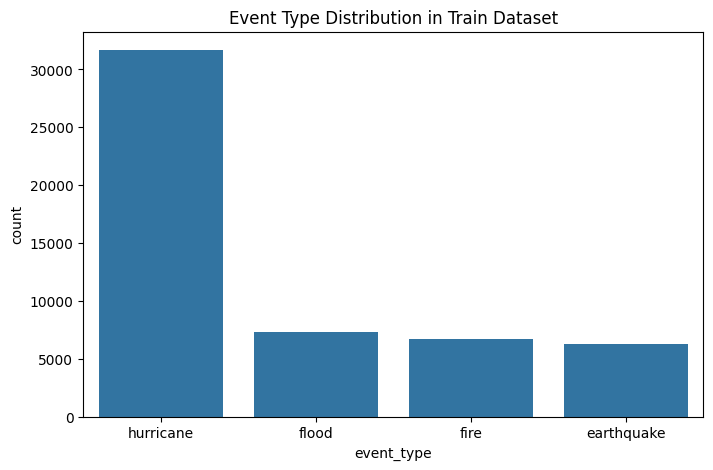

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy of the training set (in case of manipulation)
eda_df = train_df.copy(deep=True)

# Plot distribution of event type
plt.figure(figsize=(8, 5))
sns.countplot(x=eda_df['event_type'], order=eda_df['event_type'].value_counts().index)
plt.title("Event Type Distribution in Train Dataset")
plt.xticks()
plt.show()

This dataset is heavily skewed towards hurricane-related events, which account for majority of the data (30,000+ instances), while other event types -- floods, fires, and earthquakes-- are significantly less represented, each with approximately 6,000-7,000 instances. Models trained on this dataset might be more biased towards detecting hurricanes more effectively than other disaster types. We may need to perform some kind of weighting for underrepresented categories.  

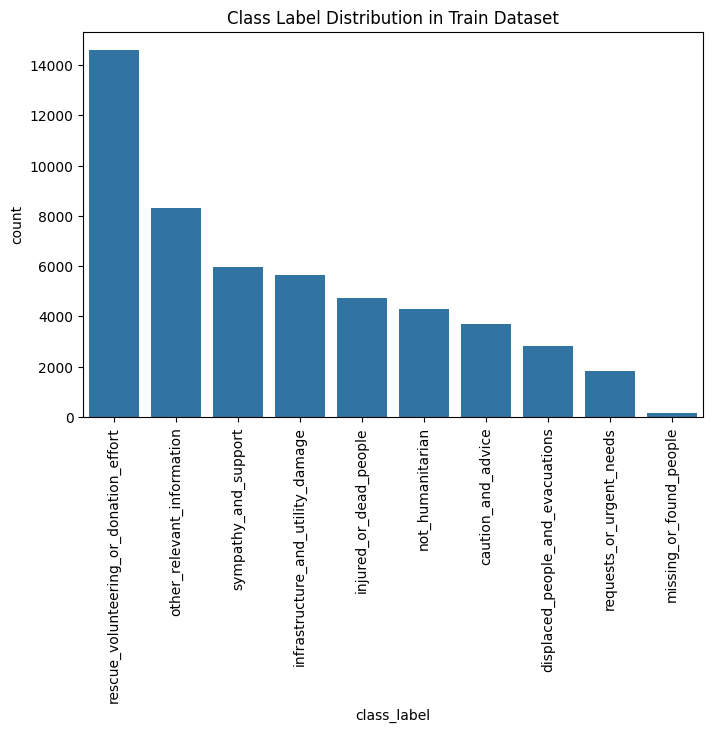

In [ ]:
# Plot distribution of class label (what the tweet is about)
plt.figure(figsize=(8, 5))
sns.countplot(x=eda_df['class_label'], order=eda_df['class_label'].value_counts().index)
plt.title("Class Label Distribution in Train Dataset")
plt.xticks(rotation=90)
plt.show()

Similarly to the `event_type` distribution, the dataset is skewed towards a single class label, `rescue_volunteering_or_donation_effort`. Again, we may need to perform some kind of weighting/sampling process.

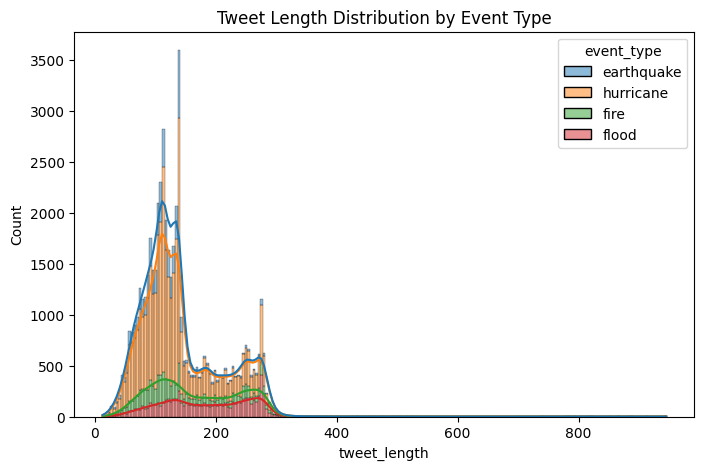

In [ ]:
# Tweet length distribution by event type
eda_df['tweet_length'] = eda_df['tweet_text'].apply(len)
eda_df['event_type'] = eda_df['event_type'].astype(str)  # Ensure event_type is a string
plt.figure(figsize=(8, 5))
sns.histplot(data=eda_df, x='tweet_length', kde=True, hue='event_type', multiple='stack')
plt.title("Tweet Length Distribution by Event Type")
plt.show()

If we assume longer tweets contain more context, tweet length could be a useful feature. However, distributions across event types (hurricane, earthquake, fire, and flood) are similar, with most tweets ranging from 100-200 characters. The max length is 280, and hurricanes dominate due to their higher representation. While overall shapes align, slight variance differences suggest some event types may have a wider range of tweet lengths.

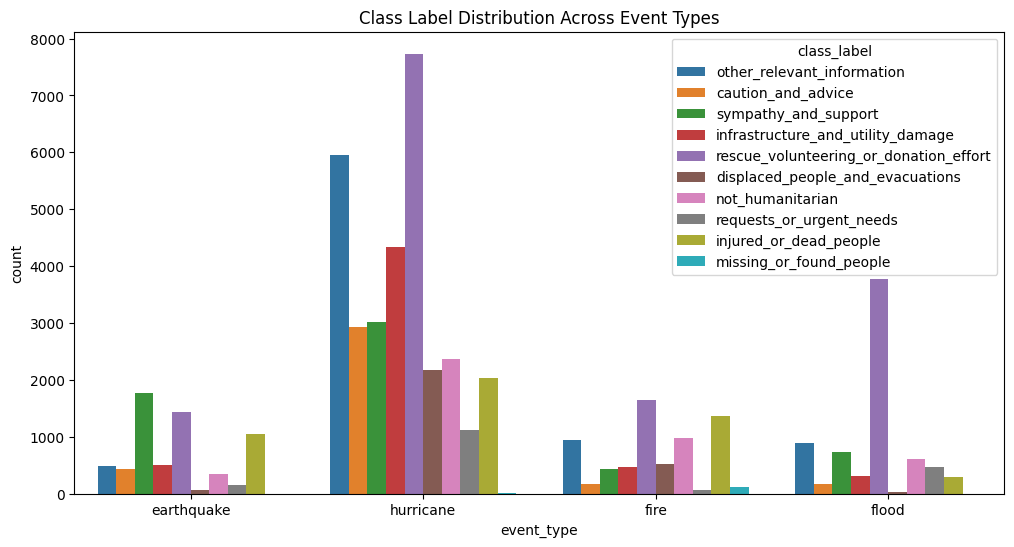

In [ ]:
# Class label distribution by event type
plt.figure(figsize=(12, 6))
sns.countplot(x='event_type', hue='class_label', data=eda_df)
plt.title("Class Label Distribution Across Event Types")
plt.xticks()
plt.show()

It may be useful to see how class labels (ex. `sympathy_and_support`) are distributed across different event types to give us a sense of which types of tweets typically belong to each category. It can also give us some insight into what the sentiment of each event might look like (ex. more `caution_and_advice` might indicate a "worse" disaster).

In the results, hurricanes dominate in every class label, but that's because they have greater representation in the datasets. Certain categories, like `other_relevant_information` and `infrastructure_and_utility_damage` are much more prevalant in hurricanes compared to other events. `sympathy_and_support` and `injured_or_dead_people` appear more frequently in earthquakes and floods relative to their total size.

We can try normalizing these results to comapre event types more fairly.

<Figure size 1200x800 with 0 Axes>

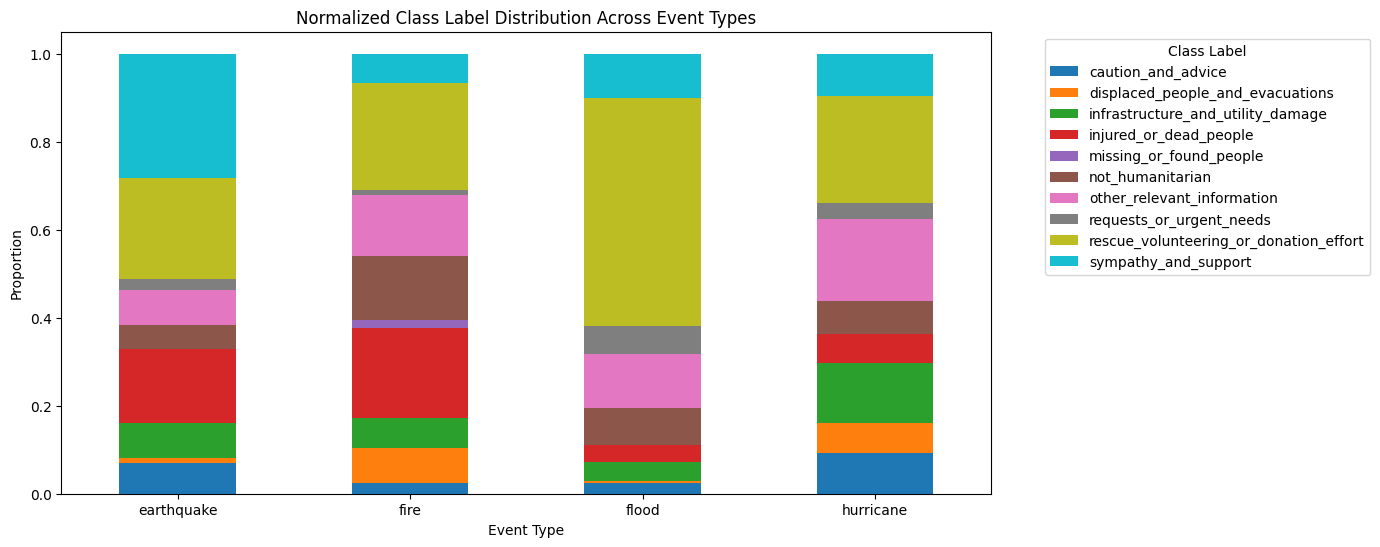

In [ ]:
# Normalized class label distribution by event type

# Get counts of class labels for each event type
normalized_counts = eda_df.groupby('event_type')['class_label'].value_counts(normalize=True).unstack()

# Plot the normalized results
plt.figure(figsize=(12, 8))
normalized_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Normalized Class Label Distribution Across Event Types")
plt.ylabel("Proportion")
plt.xlabel("Event Type")
plt.legend(title="Class Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Now, it's much easier to see proportionally which class labels dominate per event type. Floods have a very high proportion of `rescue_volunteering_or_donation_effort` and earthquakes have a very high proportion of `sympathy and support`. Hurricanes are fairly well balanced in their class label distributions.

## Summary

First, we combined all datasets to provide a comprehensive view across all natural disasters recorded in the dataset. Our exploratory data analysis focused primarily on exmaining distributions of `event_type` and `class_label`. Notably, we revealed a significant imbalance in the dataset, with hurricane events being significantly overrepresented. To ensure  more balanced model training, we will likely need to perform some strategic sampling and weighting techniques.